<a href="https://colab.research.google.com/github/amazingashis/Hackfest/blob/master/KU_Hack_Fest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflowjs
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
%matplotlib inline
import pandas.util.testing as tm

     |████████████████████████████████| 71kB 4.5MB/s 
     |████████████████████████████████| 112kB 13.4MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
labels = ['chest','skull']

img_size = 50
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_training_data('/content/drive/MyDrive/Data/data')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


chest


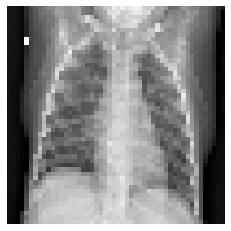

In [ ]:
plt.imshow(data[50][0],cmap = 'gray')
plt.axis('off')
print(labels[data[50][1]])

In [ ]:
X = []
y = []

for feature, label in data:
    X.append(feature)
    y.append(label)



# resize data for deep learning 
X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
X_test.shape


(50, 50, 1)

In [ ]:
X_test.shape

(1, 50, 50, 1)

In [ ]:

X_test

<function ndarray.copy>

In [ ]:
# good for balancing out disproportions in the dataset 
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=90, 
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(50,50,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(2, activation=tf.nn.softmax, name='Softmax')
])
model.summary()

testing = False
epochs = 5

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy: {}'.format(test_acc))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 8)         80        
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
Softmax (Dense)              (None, 2)                 9218      
Total params: 9,298
Trainable params: 9,298
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10/10 [==============================] - 0s 9ms/step - loss: 0.6521 - accuracy: 0.6399
Epoch 2/5
10/10 [==============================] - 0s 8ms/step - loss: 0.4364 - accuracy: 0.9900
Epoch 3/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2318 - accuracy: 0.9931
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1116 - accuracy: 0

In [ ]:
print(model.predict(X_test))

[[0.00649031 0.9935097 ]
 [0.00568572 0.99431425]
 [0.99106467 0.0089354 ]
 [0.9209912  0.07900877]
 [0.92419547 0.07580451]
 [0.03548675 0.96451324]
 [0.12676288 0.8732371 ]
 [0.00705578 0.9929442 ]
 [0.00378222 0.9962178 ]
 [0.00561054 0.9943895 ]
 [0.00712999 0.99287003]
 [0.01274426 0.9872557 ]
 [0.00401911 0.99598086]
 [0.9867605  0.01323953]
 [0.01426581 0.9857342 ]
 [0.04348541 0.9565146 ]
 [0.89267576 0.10732426]
 [0.00543868 0.9945614 ]
 [0.9107116  0.08928846]
 [0.9872251  0.01277491]
 [0.016229   0.98377097]
 [0.00699432 0.9930057 ]
 [0.99043536 0.00956469]
 [0.00803761 0.9919624 ]
 [0.9286456  0.0713544 ]
 [0.9671148  0.03288513]
 [0.0032593  0.99674076]
 [0.9013359  0.09866408]
 [0.9751575  0.02484249]
 [0.00828683 0.99171317]
 [0.00302373 0.99697626]
 [0.00543849 0.9945615 ]
 [0.99203473 0.00796523]
 [0.99384487 0.00615511]
 [0.96148944 0.03851055]
 [0.98848253 0.01151749]
 [0.00828683 0.99171317]
 [0.01299957 0.9870004 ]
 [0.07015727 0.92984277]
 [0.00490639 0.9950936 ]


In [ ]:
X_test = X_test[0]

In [ ]:
X_test = np.expand_dims(X_test, axis=0)
print(model.predict(X_test))

[[0.00649031 0.9935097 ]]


In [ ]:
print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.4.1


In [ ]:
import time
saved_model_path = "/tmp/{}".format(int(time.time()))
model.save(saved_model_path)

INFO:tensorflow:Assets written to: /tmp/1613730661/assets


In [ ]:
import time
saved_model_path = "tmp/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2021-02-19 10:31:22.267887: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)